In [1]:
import ujson
import os
import numpy as np
import glob
from itertools import combinations
from tqdm import tqdm

In [2]:
T_DATA_DIR = '/disks/disk1/tingtingxuan/HFMLNewFiles-old/Signal'
NT_DATA_DIR = '/disks/disk1/tingtingxuan/HFMLNewFiles-old/Background'

In [3]:
t_filenames = sorted(glob.glob(T_DATA_DIR + '/*.json'))
nt_filenames = sorted(glob.glob(NT_DATA_DIR + '/*.json'))
print(len(t_filenames), len(nt_filenames))

10593 10629


In [4]:
t_filenames = t_filenames[:100]
nt_filenames = nt_filenames[:100]

In [5]:
# for filename in filenames:
#     remove = False
#     with open(filename,'rb') as z:
#         try:
#             raw_data = ujson.loads(z.read())
#         except:
#             print('an error occurred when loading the json file!!!! ###################################')
#             remove = True
#     if remove:
#         print(filename)
#         os.remove(filename)

# Basic Check

In [6]:
filename = t_filenames[0]
with open(filename,'rb') as z:
    try:
        raw_data = ujson.loads(z.read())
    except:
        print('an error occurred when loading the json file!!!! ###################################')

In [7]:
print(raw_data['Events'][0].keys())
print(raw_data['Events'][0]['MetaData'].keys())
print(raw_data['Events'][0]['RawHit'].keys())
print(raw_data['Events'][0]['TruthHit'].keys())
print(raw_data['Events'][0]['TruthHit']['TruthTracks'][0].keys())

dict_keys(['MetaData', 'TruthTriggerFlag', 'RawHit', 'TruthHit'])
dict_keys(['Description', 'EventID', 'Unit', 'CollisionVertex', 'Layer_Count', 'PixelHalfLayerIndex_Count', 'Layer0', 'Layer1', 'Layer2'])
dict_keys(['Description', 'MVTXHits', 'INTTHITS'])
dict_keys(['Description', 'TruthTracks'])
dict_keys(['OriginVertexPoint', 'TrackSequenceInEvent', 'HitInTruthTrack', 'TrackID', 'MVTXHitID', 'INTTHitID', 'ParticleTypeID', 'TrackMomentum', 'TrackEnergy'])


# Feature Distribution

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [9]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'white',
    'grid.linewidth': '1.2',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}
plt.rcParams.update(ggplot_styles)

In [8]:
def get_event_list(filenames, n_events):
    event_list = []
    count = 0
    for filename in filenames:
        with open(filename,'rb') as z:
            try:
                raw_data = ujson.loads(z.read())
            except:
                print('an error occurred when loading the json file!!!! ###################################')
        for event in raw_data['Events']:
            event_list.append(event)
            count += 1
            if count >= n_events:
                break
        if count >= n_events:
            break
    print(f'loaded {count} events.')
    return event_list

In [9]:
n_events = 10000
trigger_events_list = get_event_list(t_filenames, n_events)
nontrigger_events_list = get_event_list(nt_filenames, n_events)

loaded 10000 events.
loaded 10000 events.


### #pixels

In [12]:
def get_pixel_counts(event_list):
    n_mvtxs = []
    n_intts= []
    n_pixels = []
    for event in event_list:
        n_mvtx = len(event['RawHit']['MVTXHits'])
        n_intt = len(event['RawHit']['INTTHITS'])
        n_pixel = n_mvtx + n_intt
        n_mvtxs.append(n_mvtx)
        n_intts.append(n_intt)
        n_pixels.append(n_pixel)
    return n_mvtxs, n_intts, n_pixels

In [13]:
n_mvtxs1, n_intts1, n_pixels1 = get_pixel_counts(trigger_events_list)
n_mvtxs2, n_intts2, n_pixels2 = get_pixel_counts(nontrigger_events_list)

240.5964 133.6078


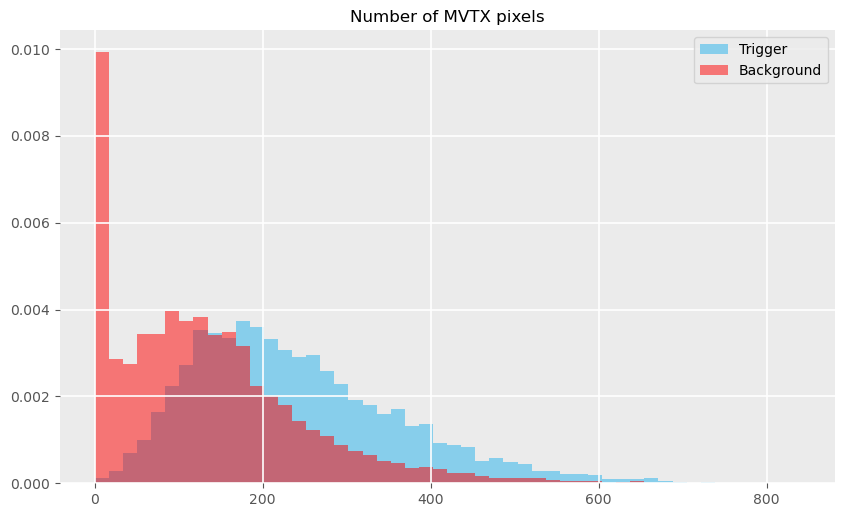

In [14]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(n_mvtxs1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(n_mvtxs2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Number of MVTX pixels')
print(np.mean(n_mvtxs1), np.mean(n_mvtxs2))

57.8427 30.8128


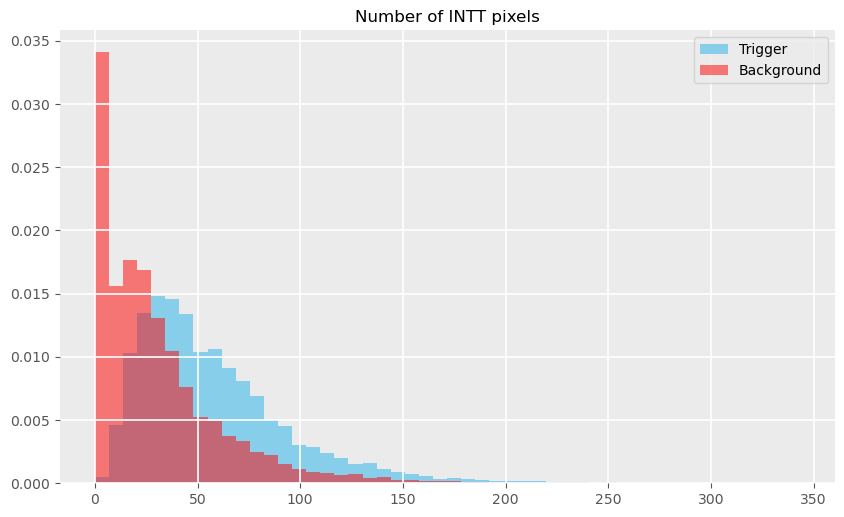

In [15]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(n_intts1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(n_intts2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Number of INTT pixels')
print(np.mean(n_intts1), np.mean(n_intts2))

298.4391 164.4206


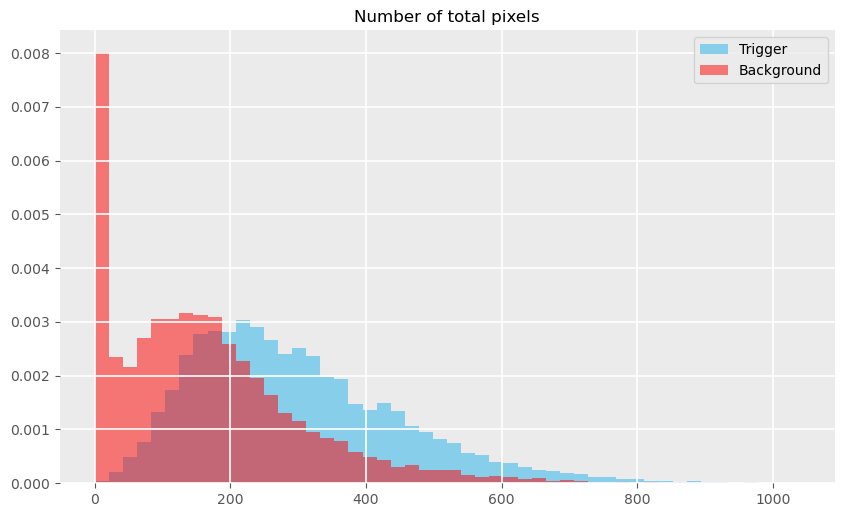

In [16]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(n_pixels1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(n_pixels2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Number of total pixels')
print(np.mean(n_pixels1), np.mean(n_pixels2))

### #tracks

In [17]:
def get_track_counts(event_list):
    n_tracks = []
    for event in event_list:
        n_track = len(event['TruthHit']['TruthTracks'])
        n_tracks.append(n_track)
    return n_tracks

In [18]:
n_tracks1 = get_track_counts(trigger_events_list)
n_tracks2 = get_track_counts(nontrigger_events_list)

14.5591 7.4383


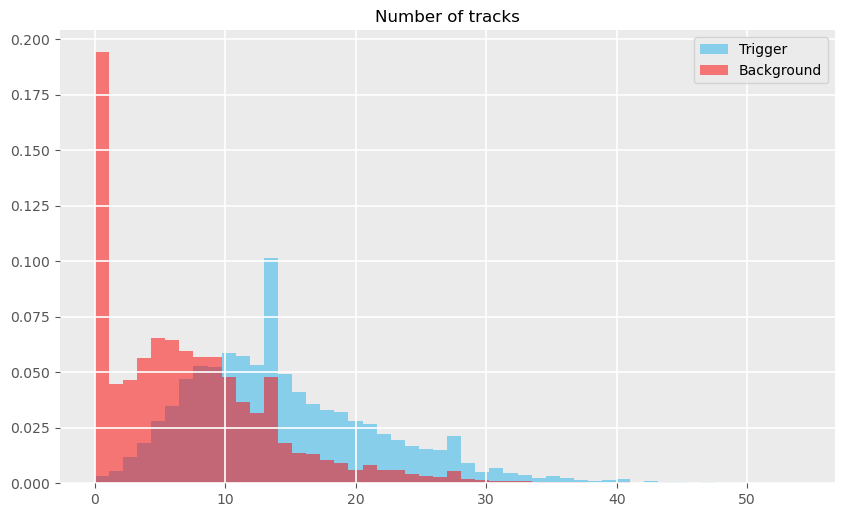

In [19]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(n_tracks1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(n_tracks2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Number of tracks')
print(np.mean(n_tracks1), np.mean(n_tracks2))

### collision vertex distribution

In [20]:
def get_cvs(event_list):
    cvs = []
    for event in event_list:
        cv = event['MetaData']['CollisionVertex']
        cvs.append(cv)
    cvs = np.array(cvs)
    return cvs

In [21]:
cvs1 = get_cvs(trigger_events_list)
cvs2 = get_cvs(nontrigger_events_list)

2.014973981527424e-06 7.593169526908723e-05
0.010060349167521288 0.010011111521706213


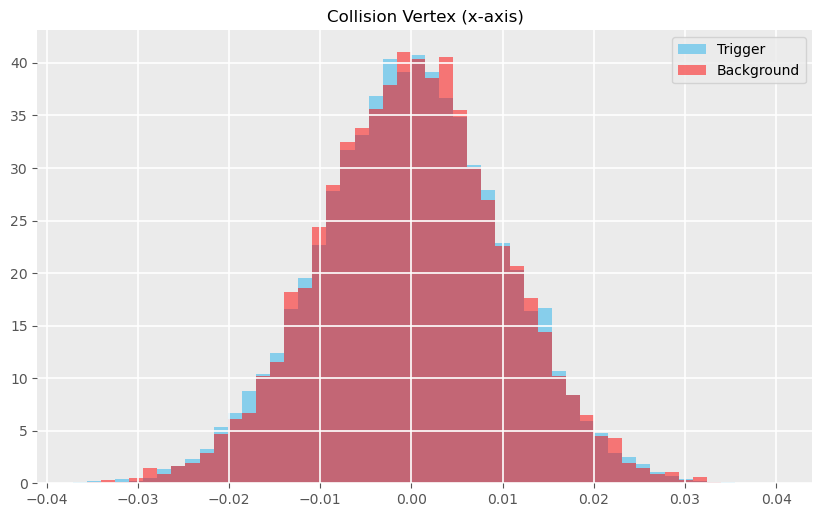

In [22]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(cvs1[:, 0], bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(cvs2[:, 0], bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Collision Vertex (x-axis)')
print(np.mean(cvs1[:, 0]), np.mean(cvs2[:, 0]))
print(np.std(cvs1[:, 0]), np.std(cvs2[:, 0]))

-9.959268377529389e-05 -6.629756272223971e-05
0.010081916421026883 0.010152164485464799


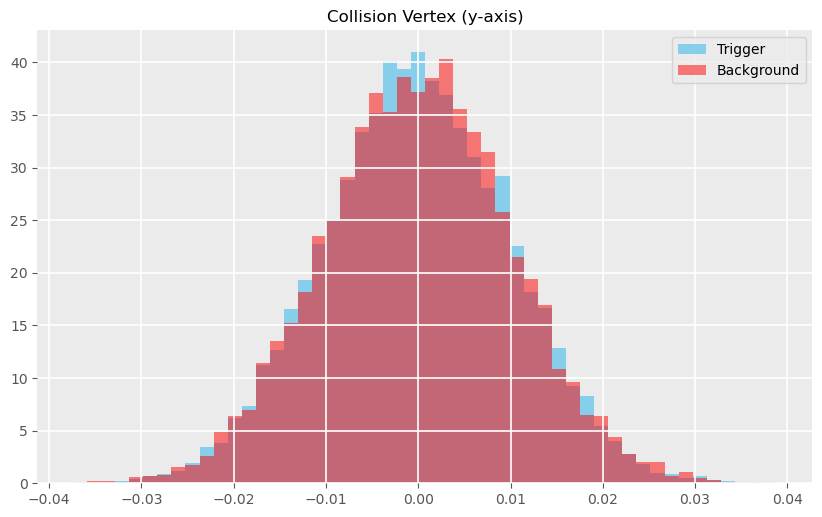

In [23]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(cvs1[:, 1], bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(cvs2[:, 1], bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Collision Vertex (y-axis)')
print(np.mean(cvs1[:, 1]), np.mean(cvs2[:, 1]))
print(np.std(cvs1[:, 1]), np.std(cvs2[:, 1]))

-0.09569608007860027 0.04995452083272594
6.9580291189606305 6.984451699897721


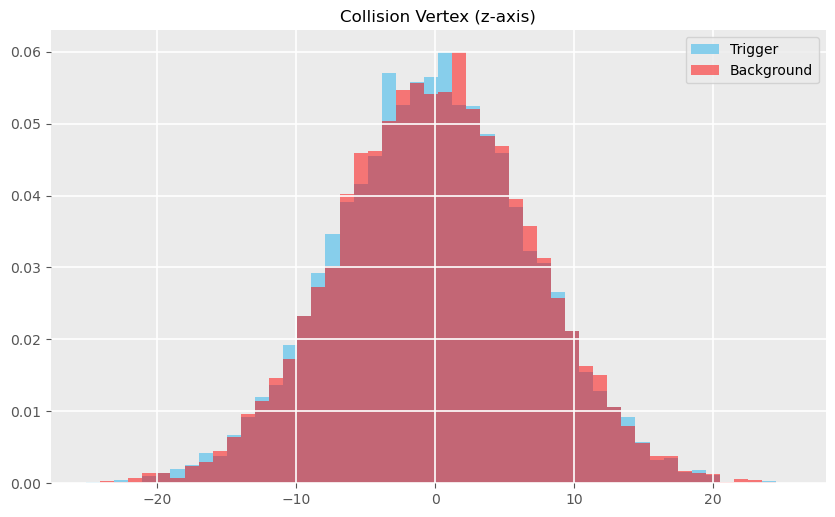

In [24]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(cvs1[:, 2], bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(cvs2[:, 2], bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Collision Vertex (z-axis)')
print(np.mean(cvs1[:, 2]), np.mean(cvs2[:, 2]))
print(np.std(cvs1[:, 2]), np.std(cvs2[:, 2]))

### Momentum

In [25]:
def get_momentum(event_list):
    momentums = []
    for event in event_list:
        tracks = event['TruthHit']['TruthTracks']
        for track in tracks:
            momentum = track['TrackMomentum']
            momentums.append(momentum)
    momentums = np.array(momentums)
    pt = np.sqrt(momentums[:, 0] ** 2 + momentums[:, 1] ** 2)
    return momentums, pt

In [26]:
momentums1, pt1 = get_momentum(trigger_events_list)
momentums2, pt2 = get_momentum(nontrigger_events_list)

0.5812164077095464 0.45750174183194653


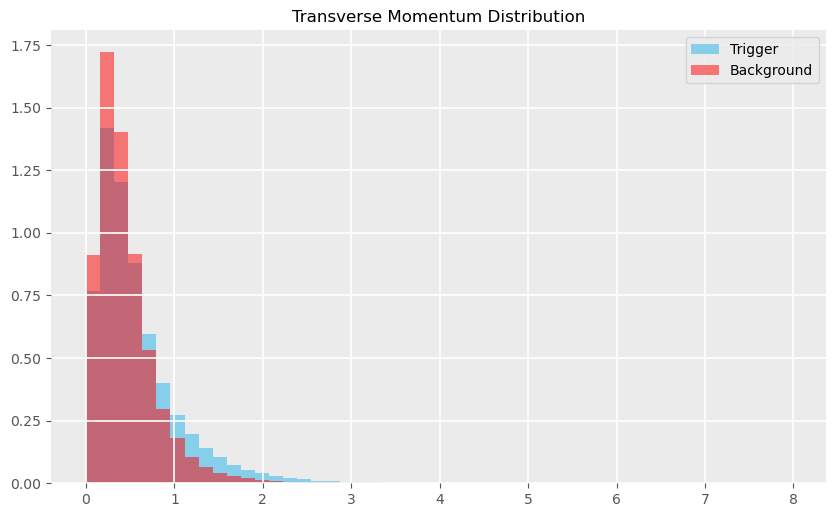

In [27]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(pt1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(pt2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Transverse Momentum Distribution')
print(np.mean(pt1), np.mean(pt2))

0.00242542541373601 -0.0014978480493035773


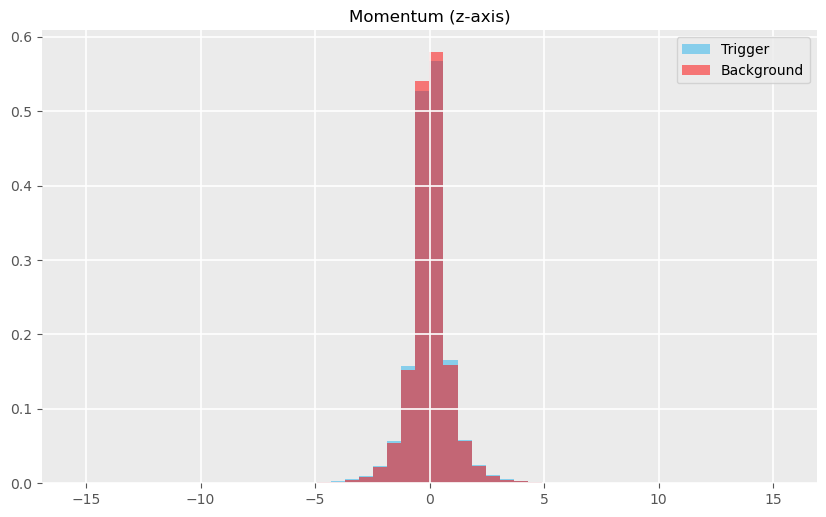

In [28]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(momentums1[:, 2], bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(momentums2[:, 2], bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Momentum (z-axis)')
print(np.mean(momentums1[:, 2]), np.mean(momentums2[:, 2]))

### Energy

In [7]:
def get_energy(event_list):
    energies = []
    for event in event_list:
        tracks = event['TruthHit']['TruthTracks']
        for track in tracks:
            momentum = track['TrackEnergy']
            energies.append(momentum)
    energies = np.array(energies)
    return energies

In [8]:
energy1 = get_energy(trigger_events_list)
energy2 = get_energy(nontrigger_events_list)

NameError: name 'trigger_events_list' is not defined

0.9522006869529315 0.8322902397918719


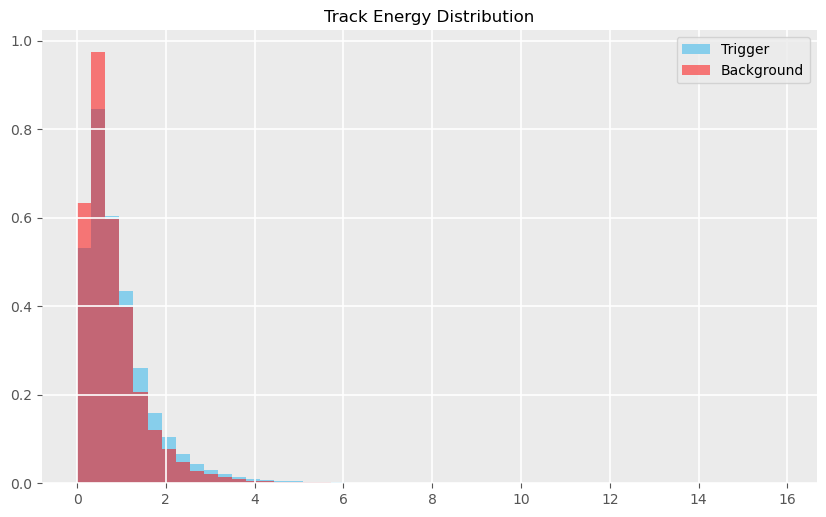

In [31]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(energy1, bins=50, color='skyblue', label='Trigger', density=True)
_ = plt.hist(energy2, bins=bins, alpha=0.5, color='red', label = 'Background', density=True)
plt.legend()
plt.title('Track Energy Distribution')
print(np.mean(energy1), np.mean(energy2))

# What's the proper threshold?

In [10]:
def get_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [11]:
def rule_always_true(track, ip):
    return track['TrackID'] != -1

def rule1(track, ip):
    momentum = track['TrackMomentum']
    return track['TrackID'] != -1 and momentum[0] ** 2 + momentum[1] ** 2 >= 0.04

# def rule1(track, ip):
#     return track['TrackID'] > 0

# def rule2(track, ip):
#     momentum = track['TrackMomentum']
#     return track['TrackID'] > 0 and momentum[0] ** 2 + momentum[1] ** 2 >= 0.04

def rule3(track, ip):
    momentum = track['TrackMomentum']
    track_origin = track['OriginVertexPoint']
    d = get_distance(track_origin, ip)
    return momentum[0] ** 2 + momentum[1] ** 2 >= 0.04 and d > 0.00001 and d < 1

In [12]:
def check_edge_candidate_threshold_for_event(event, rule, layerpair=None):
    MVTXHits = event['RawHit']['MVTXHits']
    INTTHits = event['RawHit']['INTTHITS']
    tracks = event['TruthHit']['TruthTracks']
    ip = np.array(event["MetaData"]['CollisionVertex'])
    hits = []
    layer_id = []
    for hit in MVTXHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    for hit in INTTHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    hits = np.array(hits).reshape(-1, 3)
    layer_id = np.array(layer_id)
    
    if len(hits) == 0:
        # print('empty event')
        return [], []

    # add phi and r
    r = np.sqrt(hits[:, 0]**2 + hits[:, 1]**2)
    phi = np.arctan2(hits[:, 1], hits[:, 0])

    # by doing this, we can mark the noise as -1.
    mvtx_track_id = (-1) * np.ones(len(MVTXHits))
    intt_track_id = (-1) * np.ones(len(INTTHits))
    for track in tracks:
        if rule(track, ip):
            mvtx_track_id[track['MVTXHitID'][0]] = track['TrackID']
            intt_track_id[track['INTTHitID'][0]] = track['TrackID']

    track_id = np.concatenate([mvtx_track_id, intt_track_id])

    mdphi = []
    mdphi_slope = []
    for tid in set(track_id):
        if tid != -1:
            mask = track_id == tid
            hits_on_track  = hits[mask]
            r_on_track = r[mask]
            phi_on_track = phi[mask]
            layer_id_on_track = layer_id[mask]
            # print(len(r_on_track))
            comb = np.array(list(combinations(range(len(r_on_track)), 2)))
            try:
                point1, point2 = comb[:, 0], comb[:, 1]
            except:
                continue
            if layerpair is None:
                mmask = layer_id_on_track[point1] != layer_id_on_track[point2]
            else:
                mmask = np.logical_and(layer_id_on_track[point1]==layerpair[0], layer_id_on_track[point2]==layerpair[1])
            dphi = np.abs(phi_on_track[point2] - phi_on_track[point1])[mmask]
            dr = (r_on_track[point2] - r_on_track[point1])[mmask]
            if len(dphi) == 0:
                # print('no dphi')
                continue
            mdphi.append(max(dphi))
            mdphi_slope.append(max(np.abs(dphi/dr)))
    return mdphi, mdphi_slope

In [13]:
def check_edge_candidate_threshold_for_file(filename, rule):
    with open(filename,'rb') as z:
        try:
            raw_data = ujson.loads(z.read())
        except:
            print('an error occurred when loading the json file!!!! ###################################')
            return [], []
        
    mdphis = []
    mdphi_slopes = []
    for event in raw_data['Events']:
        mdphi, mdphi_slope = check_edge_candidate_threshold_for_event(event, rule)
        mdphis.append(mdphi)
        mdphi_slopes.append(mdphi_slope)
    mdphis = np.hstack(mdphis)
    mdphi_slopes = np.hstack(mdphi_slopes)
    return mdphis, mdphi_slopes

def check_edge_candidate_threshold_for_file_layerwise(filename, rule, layerpairs):
    with open(filename,'rb') as z:
        try:
            raw_data = ujson.loads(z.read())
        except:
            print('an error occurred when loading the json file!!!! ###################################')
            return [[]], [[]]
    mdphis = [[] for i in range(len(layerpairs))]
    mdphi_slopes = [[] for i in range(len(layerpairs))]
    for event in raw_data['Events']:
        for i in range(len(layerpairs)):
            mdphi, mdphi_slope = check_edge_candidate_threshold_for_event(event, rule, layerpair=layerpairs[i])
            # print(mdphi_slopes)
            mdphis[i].extend(mdphi)
            mdphi_slopes[i].extend(mdphi_slope)
    return mdphis, mdphi_slopes

In [14]:
def check_edge_candidate_threshold_for_filelist(filenames, rule):
    mdphis = []
    mdphi_slopes = []
    for filename in tqdm(filenames):
        mdphi, mdphi_slope = check_edge_candidate_threshold_for_file(filename, rule)
        mdphis.append(mdphi)
        mdphi_slopes.append(mdphi_slope)
    mdphis = np.hstack(mdphis)
    mdphi_slopes = np.hstack(mdphi_slopes)
    return mdphis, mdphi_slopes

def check_edge_candidate_threshold_for_filelist_layerwise(filenames, rule, layerpairs):
    mdphis = [[] for i in range(len(layerpairs))]
    mdphi_slopes = [[] for i in range(len(layerpairs))]
    for filename in tqdm(filenames):
        mdphi, mdphi_slope = check_edge_candidate_threshold_for_file_layerwise(filename, rule, layerpairs)
        # print(mdphi_slopes)
        for i in range(len(layerpairs)):
            mdphis[i].extend(mdphi[i])
            mdphi_slopes[i].extend(mdphi_slope[i])

    return mdphis, mdphi_slopes

In [15]:
def check_edge_candidate_threshold_for_eventlist(eventlist, rule):
    
    mdphis = []
    mdphi_slopes = []
    for event in tqdm(eventlist):
        mdphi, mdphi_slope = check_edge_candidate_threshold_for_event(event, rule)
        mdphis.append(mdphi)
        mdphi_slopes.append(mdphi_slope)
    mdphis = np.hstack(mdphis)
    mdphi_slopes = np.hstack(mdphi_slopes)
    return mdphis, mdphi_slopes

def check_edge_candidate_threshold_for_eventlist_layerwise(eventlist, rule, layerpairs):
    mdphis = [[] for i in range(len(layerpairs))]
    mdphi_slopes = [[] for i in range(len(layerpairs))]
    for event in tqdm(eventlist):
        for i in range(len(layerpairs)):
            mdphi, mdphi_slope = check_edge_candidate_threshold_for_event(event, rule, layerpair=layerpairs[i])
            # print(mdphi_slopes)
            mdphis[i].extend(mdphi)
            mdphi_slopes[i].extend(mdphi_slope)
    return mdphis, mdphi_slopes

In [23]:
# filename = filenames[0]
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_file(filename, rule=rule3)

In [24]:
# filename = filenames[0]
# with open(filename,'rb') as z:
#     raw_data = ujson.loads(z.read())
# event = raw_data['Events'][0]
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_event(event, rule_always_true, layerpair=(0, 1))
# print(len(mdphi_slopes))
# print(mdphi, mdphi_slopes)
# np.histogram(mdphi_slopes, range=(0, 0.01), bins=10)

In [20]:
def print_threshold_table(description, mdphi_slopes):
    print('########################################')
    print(description)
    print('threshold \t coverage_track_rate')
    for threshold in np.arange(0.01, 0.11, 0.01):
        print(np.round(threshold,2), '\t\t', np.round(np.mean(mdphi_slopes<threshold),4))
    print('########################################')

def print_threshold_table_layerwise(description, mdphi_slopes, layerpairs):
    print('########################################')
    print(description)
    table_title = 'threshold \t coverage_track_rate '
    for layerpair in layerpairs:
        table_title += '\t ' + str(layerpair)
    print(table_title)
    for threshold in np.arange(0.01, 0.11, 0.01):
        row = str(np.round(threshold,2)) + '\t\t\t\t'
        for i in range(len(layerpairs)):
            row += '\t' + str(np.round(np.mean(mdphi_slopes[i]<threshold),4))
        print(row)
    print('########################################')

In [22]:
# t_filenames, nt_filenames
# eventlist = trigger_events_list
eventlist = nontrigger_events_list

In [23]:
mdphi, mdphi_slopes = check_edge_candidate_threshold_for_eventlist(eventlist, rule=rule_always_true)
print_threshold_table('For all tracks:', mdphi_slopes)
mdphi, mdphi_slopes = check_edge_candidate_threshold_for_eventlist(eventlist, rule=rule1)
print_threshold_table('For high momentum tracks:', mdphi_slopes)

100%|██████████| 10000/10000 [00:11<00:00, 904.47it/s]


########################################
For all tracks:
threshold 	 coverage_track_rate
0.01 		 0.6524
0.02 		 0.8373
0.03 		 0.8796
0.04 		 0.8982
0.05 		 0.9087
0.06 		 0.9156
0.07 		 0.9209
0.08 		 0.9248
0.09 		 0.9282
0.1 		 0.9314
########################################


100%|██████████| 10000/10000 [00:08<00:00, 1168.04it/s]


########################################
For high momentum tracks:
threshold 	 coverage_track_rate
0.01 		 0.8189
0.02 		 0.9304
0.03 		 0.9391
0.04 		 0.9445
0.05 		 0.9487
0.06 		 0.952
0.07 		 0.955
0.08 		 0.9574
0.09 		 0.9595
0.1 		 0.9615
########################################


In [18]:
mdphi, mdphi_slopes = check_edge_candidate_threshold_for_eventlist(eventlist, rule=rule3)
print_threshold_table('For all trigger tracks with 0.00001<d<1:', mdphi_slopes)

100%|██████████| 10000/10000 [00:06<00:00, 1440.34it/s]


########################################
For all trigger tracks with 0.00001<d<1:
threshold 	 coverage_track_rate
0.01 		 0.9384
0.02 		 0.9823
0.03 		 0.9879
0.04 		 0.9902
0.05 		 0.9918
0.06 		 0.9924
0.07 		 0.993
0.08 		 0.9933
0.09 		 0.9935
0.1 		 0.9936
########################################


In [31]:
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist(filenames, rule=rule_always_true)
# print_threshold_table('For all tracks:', mdphi_slopes)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist(filenames, rule=rule1)
# print_threshold_table('For high momentum tracks:', mdphi_slopes)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist(filenames, rule=rule2)
# print_threshold_table('For all positive tracks with momentum >= 0.2:', mdphi_slopes)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist(filenames, rule=rule3)
# print_threshold_table('For all trigger tracks with 0.00001<d<1:', mdphi_slopes)


In [34]:
layerpairs = [(0, 1), (1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 5), (4, 6), (3, 4), (5, 6) ]
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_eventlist_layerwise(eventlist, rule=rule_always_true, layerpairs=layerpairs)
print_threshold_table_layerwise('For all tracks:', mdphi_slopes, layerpairs=layerpairs)
mdphi, mdphi_slopes = check_edge_candidate_threshold_for_eventlist_layerwise(eventlist, rule=rule1, layerpairs=layerpairs)
print_threshold_table_layerwise('For high momentum tracks:', mdphi_slopes, layerpairs=layerpairs)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist_layerwise(filenames, rule=rule_always_true, layerpairs=layerpairs)
# print_threshold_table_layerwise('For all tracks:', mdphi_slopes, layerpairs=layerpairs)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist_layerwise(filenames, rule=rule1, layerpairs=layerpairs)
# print_threshold_table_layerwise('For high momentum tracks:', mdphi_slopes, layerpairs=layerpairs)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist_layerwise(filenames, rule=rule2, layerpairs=layerpairs)
# print_threshold_table_layerwise('For all positive tracks with momentum >= 0.2:', mdphi_slopes, layerpairs=layerpairs)
# mdphi, mdphi_slopes = check_edge_candidate_threshold_for_filelist_layerwise(filenames, rule=rule3, layerpairs=layerpairs)
# print_threshold_table_layerwise('For all trigger tracks with 0.00001<d<1:', mdphi_slopes, layerpairs=layerpairs)

########################################
For all tracks:
threshold 	 coverage_track_rate 	 (0, 1)	 (1, 2)	 (2, 3)	 (2, 4)	 (3, 5)	 (3, 6)	 (4, 5)	 (4, 6)	 (3, 4)	 (5, 6)
0.01					0.7531	0.7614	0.766	0.7718	0.7569	0.767	0.7606	0.7587	0.3651	0.3583
0.02					0.9041	0.9007	0.884	0.8879	0.871	0.8815	0.8754	0.8726	0.4521	0.4471
0.03					0.9359	0.9319	0.9128	0.9188	0.9013	0.9095	0.9071	0.9022	0.482	0.4729
0.04					0.9476	0.9444	0.9253	0.9315	0.9129	0.9216	0.9194	0.9155	0.4954	0.4873
0.05					0.9537	0.9517	0.9326	0.9393	0.9191	0.9279	0.9262	0.9226	0.5048	0.4968
0.06					0.9574	0.9559	0.9381	0.9447	0.9225	0.9312	0.9309	0.9264	0.5119	0.5036
0.07					0.9604	0.959	0.9421	0.9481	0.9245	0.9329	0.9329	0.9285	0.5157	0.5058
0.08					0.9628	0.9614	0.9453	0.9513	0.9258	0.9343	0.9344	0.9297	0.5211	0.5084
0.09					0.9645	0.9636	0.9476	0.9534	0.9269	0.935	0.9353	0.9307	0.5226	0.5101
0.1					0.966	0.9651	0.9491	0.9548	0.9276	0.9353	0.9359	0.9314	0.5243	0.511
########################################


100%|██████████| 10000/10000 [02:07<00:00, 78.73it/s]


########################################
For high momentum tracks:
threshold 	 coverage_track_rate 	 (0, 1)	 (1, 2)	 (2, 3)	 (2, 4)	 (3, 5)	 (3, 6)	 (4, 5)	 (4, 6)	 (3, 4)	 (5, 6)
0.01					0.8878	0.9016	0.9211	0.9257	0.9105	0.9197	0.9154	0.915	0.6213	0.6071
0.02					0.9653	0.9627	0.9537	0.9583	0.9483	0.9558	0.9544	0.954	0.6793	0.6542
0.03					0.9697	0.9678	0.9597	0.9647	0.9562	0.963	0.9622	0.962	0.6885	0.6591
0.04					0.9727	0.9715	0.9637	0.9688	0.9608	0.9671	0.9671	0.9663	0.6918	0.6632
0.05					0.975	0.9744	0.9667	0.9718	0.9633	0.9688	0.9694	0.9687	0.6971	0.668
0.06					0.9767	0.9764	0.9693	0.9744	0.9646	0.9702	0.9709	0.97	0.7007	0.6688
0.07					0.9783	0.9783	0.9715	0.9765	0.9654	0.9706	0.9713	0.9704	0.7034	0.6688
0.08					0.9795	0.9797	0.9732	0.9781	0.9659	0.971	0.9717	0.9706	0.7057	0.6692
0.09					0.9805	0.9809	0.9743	0.979	0.9661	0.971	0.972	0.9708	0.7067	0.6695
0.1					0.9815	0.9817	0.975	0.9796	0.9662	0.971	0.9722	0.971	0.7073	0.6699
########################################


# Will track miss any layers?

In [35]:
from prettytable import PrettyTable


In [36]:
def check_track_layer_for_event(event, rule):
    MVTXHits = event['RawHit']['MVTXHits']
    INTTHits = event['RawHit']['INTTHITS']
    tracks = event['TruthHit']['TruthTracks']
    ip = np.array(event["MetaData"]['CollisionVertex'])
    hits = []
    layer_id = []
    for hit in MVTXHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    for hit in INTTHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    hits = np.array(hits).reshape(-1, 3)
    layer_id = np.array(layer_id)
    
    if len(hits) == 0:
        # print('empty event')
        return np.zeros(10)


    # by doing this, we can mark the noise as -1.
    mvtx_track_id = (-1) * np.ones(len(MVTXHits))
    intt_track_id = (-1) * np.ones(len(INTTHits))
    for track in tracks:
        if rule(track, ip):
            mvtx_track_id[track['MVTXHitID'][0]] = track['TrackID']
            intt_track_id[track['INTTHitID'][0]] = track['TrackID']

    track_id = np.concatenate([mvtx_track_id, intt_track_id])

    count = np.zeros(10)
    for tid in set(track_id):
        if tid != -1:
            mask = track_id == tid
            hits_on_track  = hits[mask]
            layer_id_on_track = layer_id[mask]
            layer_set =set(layer_id_on_track)
            count[list(layer_set)] += 1
            count[7] += 1
            if 3 in layer_set or 4 in layer_set:
                count[8] += 1
            if 5 in layer_set or 6 in layer_set:
                count[9] += 1
            
    return count

In [37]:
def check_track_layer_for_file(filename, rule):
    with open(filename,'rb') as z:
        try:
            raw_data = ujson.loads(z.read())
        except:
            print('an error occurred when loading the json file!!!! ###################################')
            return np.zeros(10)
        
    count = np.zeros(10)
    for event in raw_data['Events']:
        count += check_track_layer_for_event(event, rule)
    return count

In [42]:
def check_track_layer_for_filelist(filenames, rule):
    count = np.zeros(10)
    for filename in tqdm(filenames):
        count += check_track_layer_for_file(filename, rule)
    return count

In [43]:
def check_track_layer_for_eventlist(eventlist, rule):
    count = np.zeros(10)
    for event in tqdm(eventlist):
        count += check_track_layer_for_event(event, rule)
    return count

In [40]:
def print_count_table(description, count):
    print(description)
    t = PrettyTable([i for i in range(3)] + ['(3, 4)', '(5, 6)'] + [i for i in range(3, 7)] + [ 'Total'])
    row = list(count[:3]) + [count[8], count[9]] + list(count[3:7]) + [count[7]]
    t.add_row(row)
    t.add_row(np.round(row/row[9], 2))
    print(t)

In [47]:
eventlist = nontrigger_events_list

In [48]:
count = check_track_layer_for_eventlist(eventlist, rule=rule_always_true)
print_count_table('For all tracks:', count)
count = check_track_layer_for_eventlist(eventlist, rule=rule1)
print_count_table('For high momentum tracks:', count)
# count = check_track_layer_for_filelist(filenames, rule=rule_always_true)
# print_count_table('For all tracks:', count)
# count = check_track_layer_for_filelist(filenames, rule=rule1)
# print_count_table('For all positive tracks:', count)
# count = check_track_layer_for_filelist(filenames, rule=rule2)
# print_count_table('For all positive tracks with momentum >= 0.2:', count)

100%|██████████| 10000/10000 [00:03<00:00, 2568.58it/s]


For all tracks:
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|    0    |    1    |    2    |  (3, 4) |  (5, 6) |    3    |    4    |    5    |    6    |  Total  |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 70159.0 | 70614.0 | 69869.0 | 68908.0 | 57674.0 | 37946.0 | 33798.0 | 31556.0 | 28684.0 | 73775.0 |
|   0.95  |   0.96  |   0.95  |   0.93  |   0.78  |   0.51  |   0.46  |   0.43  |   0.39  |   1.0   |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


100%|██████████| 10000/10000 [00:02<00:00, 3465.40it/s]

For high momentum tracks:
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|    0    |    1    |    2    |  (3, 4) |  (5, 6) |    3    |    4    |    5    |    6    |  Total  |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 56385.0 | 56424.0 | 55507.0 | 54927.0 | 46492.0 | 29811.0 | 26647.0 | 25116.0 | 22777.0 | 58506.0 |
|   0.96  |   0.96  |   0.95  |   0.94  |   0.79  |   0.51  |   0.46  |   0.43  |   0.39  |   1.0   |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [46]:

count = check_track_layer_for_eventlist(eventlist, rule=rule3)
print_count_table('For all trigger tracks with 0.00001<d<1:', count)

100%|██████████| 10000/10000 [00:05<00:00, 1707.39it/s]

For all trigger tracks with 0.00001<d<1:
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|    0    |    1    |    2    |  (3, 4) |  (5, 6) |    3    |    4    |    5    |    6    |  Total  |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 25902.0 | 25716.0 | 25461.0 | 25330.0 | 23907.0 | 13322.0 | 12588.0 | 12621.0 | 11771.0 | 26245.0 |
|   0.99  |   0.98  |   0.97  |   0.97  |   0.91  |   0.51  |   0.48  |   0.48  |   0.45  |   1.0   |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
